In [1]:
# get the mnist datasets
import os
if False:
    !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
    !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
    !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
    !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


/bin/sh: wget: command not found
/bin/sh: wget: command not found
/bin/sh: wget: command not found
/bin/sh: wget: command not found


FILE FORMATS FOR THE MNIST DATABASE
The data is stored in a very simple file format designed for storing vectors and multidimensional matrices. General info on this format is given at the end of this page, but you don't need to read that to use the data files.
All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

There are 4 files:

train-images-idx3-ubyte: training set images
train-labels-idx1-ubyte: training set labels
t10k-images-idx3-ubyte:  test set images
t10k-labels-idx1-ubyte:  test set labels

The training set contains 60000 examples, and the test set 10000 examples.

The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.

TRAINING SET LABEL FILE (train-labels-idx1-ubyte):
[offset] [type]          [value]          [description]
0000     32 bit integer  0x00000801(2049) magic number (MSB first)
0004     32 bit integer  60000            number of items
0008     unsigned byte   ??               label
0009     unsigned byte   ??               label
........
xxxx     unsigned byte   ??               label
The labels values are 0 to 9.

TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
[offset] [type]          [value]          [description]
0000     32 bit integer  0x00000803(2051) magic number
0004     32 bit integer  60000            number of images
0008     32 bit integer  28               number of rows
0012     32 bit integer  28               number of columns
0016     unsigned byte   ??               pixel
0017     unsigned byte   ??               pixel
........
xxxx     unsigned byte   ??               pixel
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

TEST SET LABEL FILE (t10k-labels-idx1-ubyte):
[offset] [type]          [value]          [description]
0000     32 bit integer  0x00000801(2049) magic number (MSB first)
0004     32 bit integer  10000            number of items
0008     unsigned byte   ??               label
0009     unsigned byte   ??               label
........
xxxx     unsigned byte   ??               label
The labels values are 0 to 9.

TEST SET IMAGE FILE (t10k-images-idx3-ubyte):
[offset] [type]          [value]          [description]
0000     32 bit integer  0x00000803(2051) magic number
0004     32 bit integer  10000            number of images
0008     32 bit integer  28               number of rows
0012     32 bit integer  28               number of columns
0016     unsigned byte   ??               pixel
0017     unsigned byte   ??               pixel
........
xxxx     unsigned byte   ??               pixel
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

In [2]:
!ls

Digits.ipynb            t10k-images-idx3-ubyte  train-images-idx3-ubyte
mnist.ipynb             t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


In [6]:
f1 = 'train-images-idx3-ubyte'
f2 = 'train-labels-idx1-ubyte'
f3 = 't10k-images-idx3-ubyte'
f4 = 't10k-labels-idx1-ubyte'

In [20]:
import numpy as np

def int32_from_file(filename, n_header = 0):
    with open(filename, "rb") as f:
        _ = f.read(n_header)
        while True:
            byte = f.read(4)
            if not byte:
                break
            yield(int.from_bytes(byte, byteorder='big'))

def int8_from_file(filename, n_header = 0):
    with open(filename, "rb") as f:
        _ = f.read(n_header)
        while True:
            byte = f.read(1)
            if not byte:
                break
            yield(int.from_bytes(byte, byteorder='big'))

def image_from_file(filename, n, m, n_header):
    with open(filename, "rb") as f:
        _ = f.read(n_header)
        while True:
            byte = f.read(n*m)
            if not byte:
                break
            ints = np.array([byte[i] for i in range(n*m)], np.uint8)
            yield ints


In [21]:
b1 = int32_from_file(f1)
magic = b1.__next__()
n_images = b1.__next__()
rows = b1.__next__()
cols = b1.__next__()

print(magic, n_images, rows, cols)

2051 60000 28 28


In [22]:
b2 = image_from_file(f1, rows, cols, n_header=16)
train_images = []
for i in range(n_images):
    train_images.append(b2.__next__())
    if i % 10000 == 0:
        print('processing image ', str(i))

processing image  0
processing image  10000
processing image  20000
processing image  30000
processing image  40000
processing image  50000


In [23]:
# get the training labels.

b3 = int32_from_file(f2)
magic = b3.__next__()
n_labels = b3.__next__()

train_labels = []
b4 = int8_from_file(f2, 8)
for i in range(n_labels):
    train_labels.append(b4.__next__())
    

In [24]:
train_labels[0:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [25]:
b5 = int32_from_file(f3)
magic = b5.__next__()
n_images = b5.__next__()
rows = b5.__next__()
cols = b5.__next__()

print(magic, n_images, rows, cols)

b6 = image_from_file(f3, rows, cols, n_header=16)
test_images = []
for i in range(n_images):
    test_images.append(b6.__next__())
    if i % 1000 == 0:
        print('processing image ', str(i))
        


2051 10000 28 28
processing image  0
processing image  1000
processing image  2000
processing image  3000
processing image  4000
processing image  5000
processing image  6000
processing image  7000
processing image  8000
processing image  9000


In [26]:
# get the test labels.

b7 = int32_from_file(f2)
magic = b7.__next__()
n_labels = b7.__next__()

test_labels = []
b8 = int8_from_file(f2, 8)
for i in range(n_labels):
    test_labels.append(b8.__next__())
    

In [27]:
test_labels[0:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

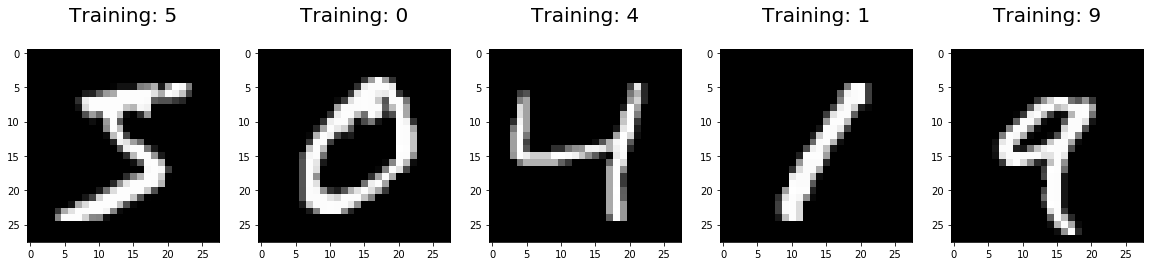

In [30]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [31]:
from sklearn.linear_model import LogisticRegression


In [38]:
lr = LogisticRegression(solver = 'sag', max_iter = 100, tol = 1e-2, verbose = 1)
lr.fit(train_images, train_labels)

/Users/JustinKim/Documents/workspace/AI/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 43 epochs took 24 seconds
convergence after 40 epochs took 21 seconds
convergence after 42 epochs took 21 seconds
convergence after 49 epochs took 24 seconds
convergence after 35 epochs took 20 seconds
convergence after 40 epochs took 27 seconds
convergence after 57 epochs took 33 seconds
convergence after 51 epochs took 27 seconds
convergence after 42 epochs took 20 seconds
convergence after 57 epochs took 27 seconds


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.1min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.01, verbose=1,
                   warm_start=False)

In [41]:
lr.predict(test_images[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [43]:
test_labels[0:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]